In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')


data=pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Datasets/BankData/bank-data/bank-full.csv',sep=';')



Mounted at /content/drive


In [2]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
data.shape

(41199, 21)

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
data.shape

(45211, 17)

In [10]:
col_list=list(data.columns)

In [11]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [12]:
col_list.remove('y')

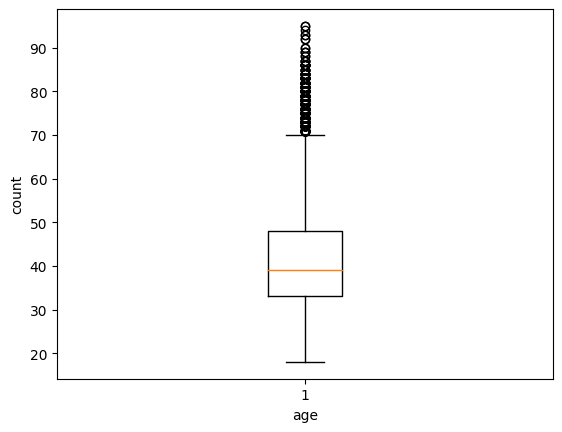

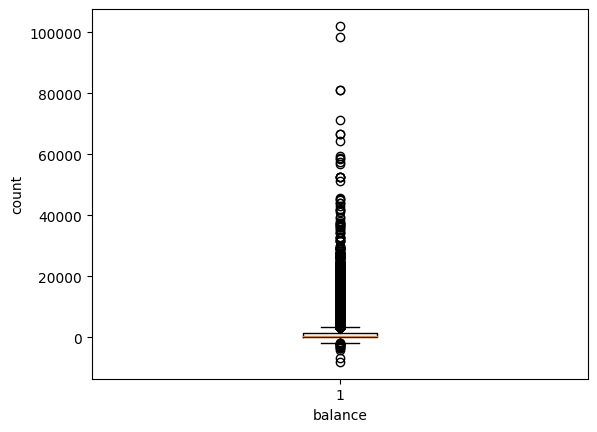

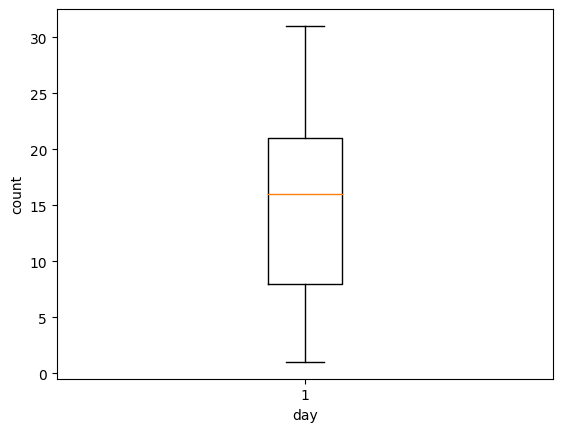

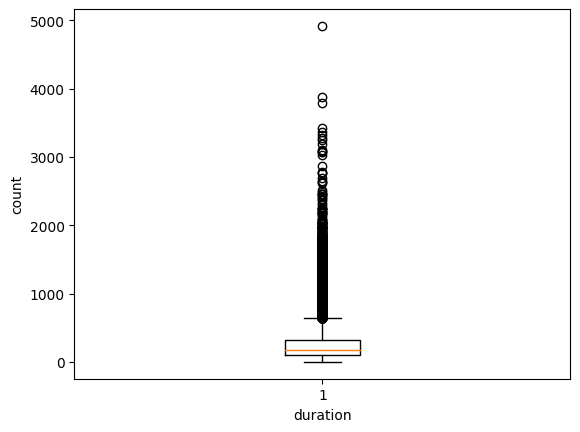

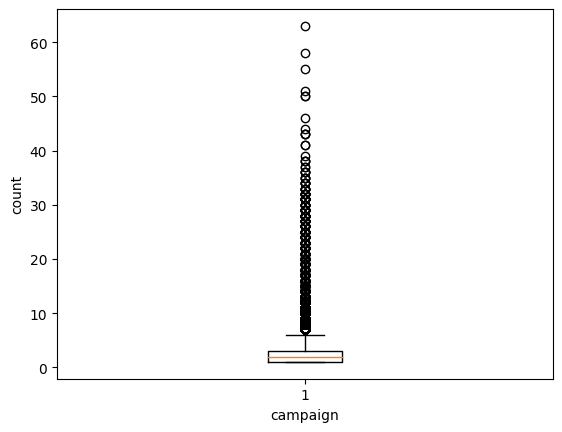

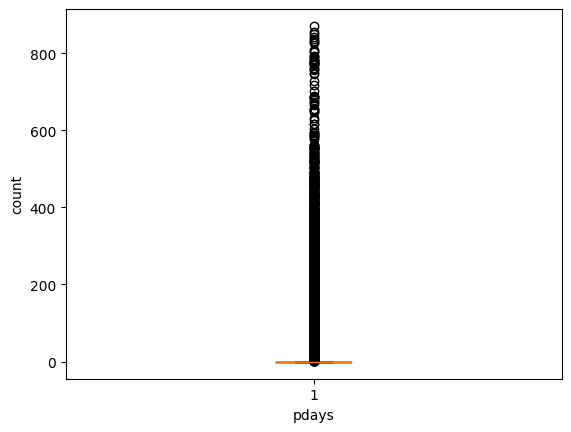

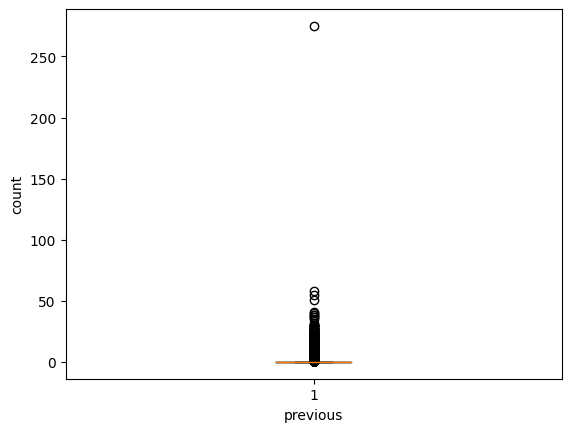

In [13]:
for i in col_list:
    if data[i].dtypes==object:
        pass
    else:
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [14]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
print(iqr)

age           15.0
balance     1356.0
day           13.0
duration     216.0
campaign       2.0
pdays          0.0
previous       0.0
dtype: float64


In [15]:
data['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [16]:
data=data[~((data<(q1-1.5*iqr))|(data>q3+1.5*iqr)).any(axis=1)] #removing outliers

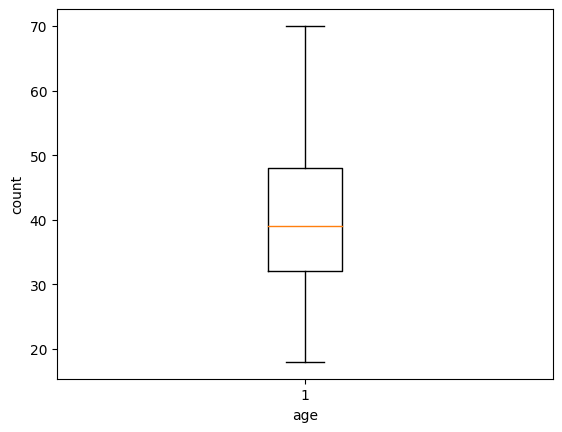

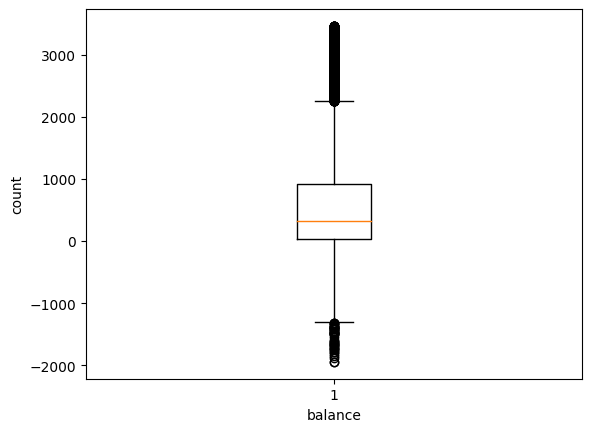

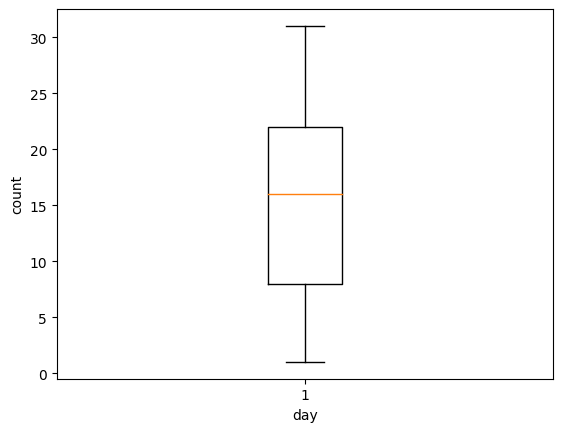

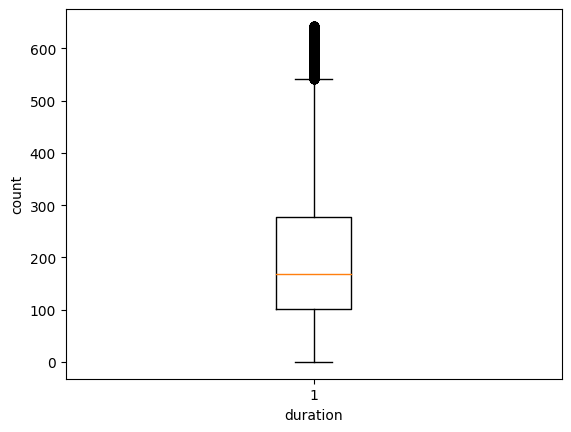

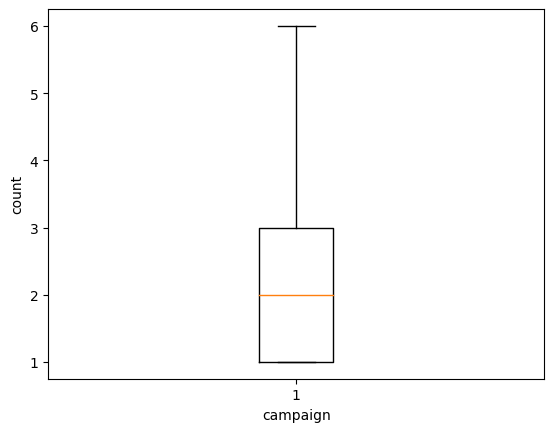

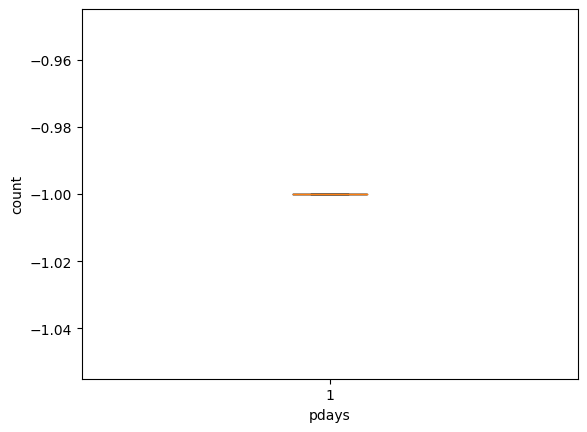

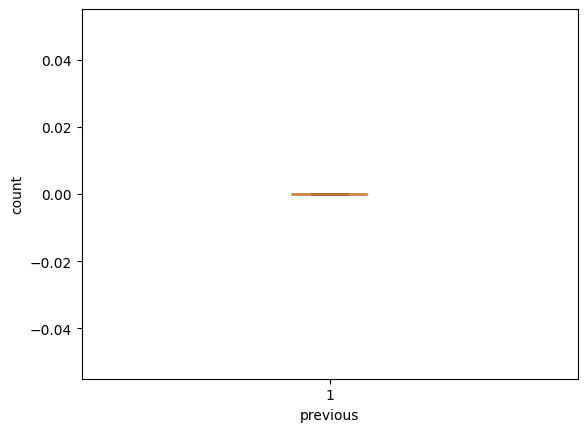

In [17]:

for i in col_list:
    if data[i].dtypes==object:
        pass
    else:
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()


In [ ]:
#data

In [18]:
bins=[0,1,5,10,25,50,100]
data['age']=pd.cut(data['age'],bins)
data['age']=data.age.astype('str')

In [19]:
data['age'].dtypes

dtype('O')

# labelencoding

In [20]:
data.dtypes

age          object
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [21]:
col_list=[]
for i in data.columns:
    if((data[i].dtypes=='object')&(i!='y')):
        col_list.append(i)

In [22]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
labelencoder=LabelEncoder()

In [25]:
for i in col_list:
    data[i]=labelencoder.fit_transform(data[i])

In [26]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,2,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,0,no
1,1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,0,no
2,1,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,0,no
3,1,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,0,no
4,1,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,1,4,1,2,0,1428,0,0,0,16,9,333,2,-1,0,0,no
45202,1,0,2,1,0,557,0,0,0,17,9,224,1,-1,0,0,yes
45203,0,8,2,2,0,113,0,0,0,17,9,266,1,-1,0,0,yes
45205,0,9,2,1,0,505,0,1,0,17,9,386,2,-1,0,0,yes


In [ ]:
#vif

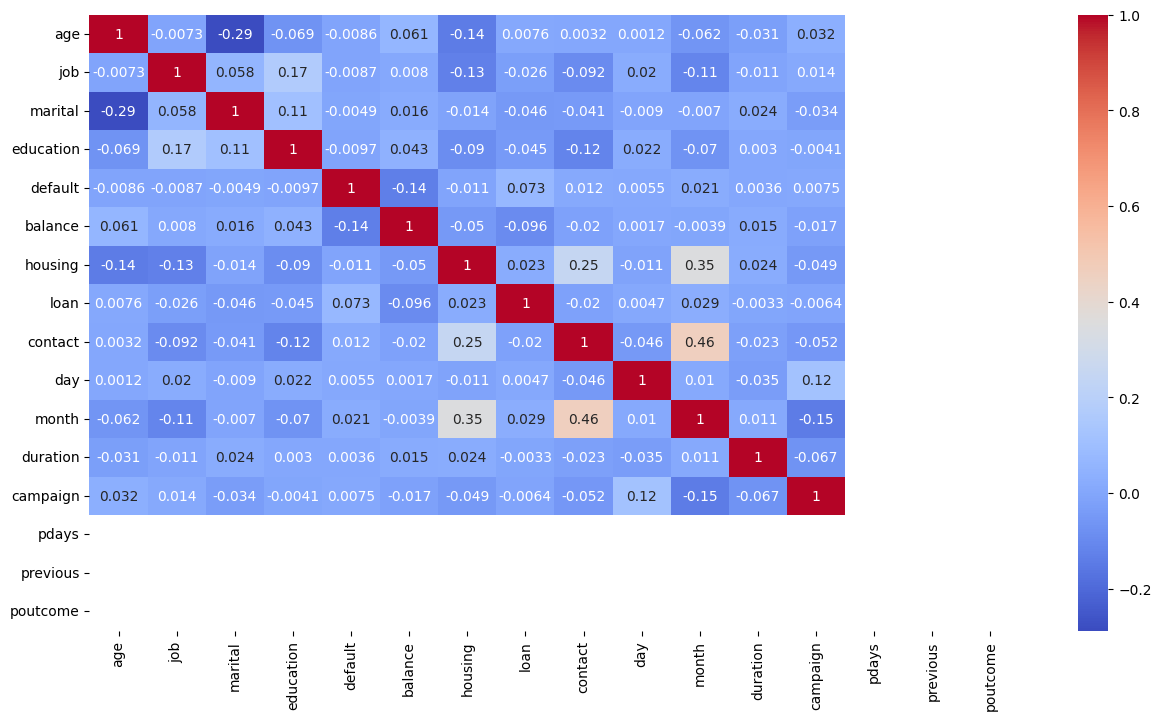

In [27]:
fig = plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [28]:
data.dtypes

age           int64
job           int64
marital       int64
education     int64
default       int64
balance       int64
housing       int64
loan          int64
contact       int64
day           int64
month         int64
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome      int64
y            object
dtype: object

In [29]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.007346,-0.287383,-0.068796,-0.008565,0.060805,-0.142204,0.007599,0.003173,0.001246,-0.061542,-0.030688,0.031580,NaN,NaN,NaN
job,-0.007346,1.000000,0.058394,0.168945,-0.008676,0.008034,-0.127692,-0.025926,-0.091659,0.019569,-0.113359,-0.010523,0.013510,NaN,NaN,NaN
marital,-0.287383,0.058394,1.000000,0.109834,-0.004903,0.016470,-0.014181,-0.046157,-0.041033,-0.008960,-0.007041,0.023957,-0.033547,NaN,NaN,NaN
education,-0.068796,0.168945,0.109834,1.000000,-0.009717,0.042598,-0.090092,-0.044858,-0.118649,0.022304,-0.070333,0.002961,-0.004077,NaN,NaN,NaN
default,-0.008565,-0.008676,-0.004903,-0.009717,1.000000,-0.135784,-0.010748,0.072917,0.011792,0.005531,0.020621,0.003600,0.007502,NaN,NaN,NaN
balance,0.060805,0.008034,0.016470,0.042598,-0.135784,1.000000,-0.050350,-0.095966,-0.019679,0.001735,-0.003857,0.015164,-0.017398,NaN,NaN,NaN
housing,-0.142204,-0.127692,-0.014181,-0.090092,-0.010748,-0.050350,1.000000,0.022807,0.246687,-0.010870,0.346797,0.024083,-0.049441,NaN,NaN,NaN
loan,0.007599,-0.025926,-0.046157,-0.044858,0.072917,-0.095966,0.022807,1.000000,-0.020482,0.004692,0.028826,-0.003329,-0.006379,NaN,NaN,NaN
contact,0.003173,-0.091659,-0.041033,-0.118649,0.011792,-0.019679,0.246687,-0.020482,1.000000,-0.046104,0.458559,-0.022969,-0.051736,NaN,NaN,NaN
day,0.001246,0.019569,-0.008960,0.022304,0.005531,0.001735,-0.010870,0.004692,-0.046104,1.000000,0.010004,-0.034670,0.119663,NaN,NaN,NaN


In [30]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

In [32]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

In [33]:
x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature        VIF
0         age   1.126320
1         job   1.050810
2     marital   1.108291
3   education   1.059450
4     default   1.023885
5     balance   1.035886
6     housing   1.189750
7        loan   1.019554
8     contact   1.303305
9         day   1.020584
10      month   1.403588
11   duration   1.008078
12   campaign   1.043419
13      pdays  35.815706
14   previous        NaN
15   poutcome        NaN


In [34]:
data=data.drop(['pdays'],axis=1)

In [35]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0         age  5.604716
1         job  2.709800
2     marital  4.079620
3   education  3.567200
4     default  1.046177
5     balance  1.574254
6     housing  2.562755
7        loan  1.223786
8     contact  2.180493
9         day  4.301068
10      month  6.062576
11   duration  2.954705
12   campaign  3.452086
13   previous       NaN
14   poutcome       NaN


In [37]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0         age  5.604716
1         job  2.709800
2     marital  4.079620
3   education  3.567200
4     default  1.046177
5     balance  1.574254
6     housing  2.562755
7        loan  1.223786
8     contact  2.180493
9         day  4.301068
10      month  6.062576
11   duration  2.954705
12   campaign  3.452086
13   previous       NaN
14   poutcome       NaN


In [38]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0         age  5.604716
1         job  2.709800
2     marital  4.079620
3   education  3.567200
4     default  1.046177
5     balance  1.574254
6     housing  2.562755
7        loan  1.223786
8     contact  2.180493
9         day  4.301068
10      month  6.062576
11   duration  2.954705
12   campaign  3.452086
13   previous       NaN
14   poutcome       NaN


In [39]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0         age  5.604716
1         job  2.709800
2     marital  4.079620
3   education  3.567200
4     default  1.046177
5     balance  1.574254
6     housing  2.562755
7        loan  1.223786
8     contact  2.180493
9         day  4.301068
10      month  6.062576
11   duration  2.954705
12   campaign  3.452086
13   previous       NaN
14   poutcome       NaN


In [40]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0         age  5.604716
1         job  2.709800
2     marital  4.079620
3   education  3.567200
4     default  1.046177
5     balance  1.574254
6     housing  2.562755
7        loan  1.223786
8     contact  2.180493
9         day  4.301068
10      month  6.062576
11   duration  2.954705
12   campaign  3.452086
13   previous       NaN
14   poutcome       NaN


In [41]:
col_list=[]
for i in data.columns:
    if ((data[i].dtypes!=object)&(i!='y')):
        col_list.append(i)

x=data[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
print(vif_data)

      feature       VIF
0         age  5.604716
1         job  2.709800
2     marital  4.079620
3   education  3.567200
4     default  1.046177
5     balance  1.574254
6     housing  2.562755
7        loan  1.223786
8     contact  2.180493
9         day  4.301068
10      month  6.062576
11   duration  2.954705
12   campaign  3.452086
13   previous       NaN
14   poutcome       NaN


In [42]:
x=pd.DataFrame(data[vif_data.feature])

In [43]:
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,2,4,1,2,0,2143,1,0,2,5,8,261,1,0,0
1,1,9,2,1,0,29,1,0,2,5,8,151,1,0,0
2,1,2,1,1,0,2,1,1,2,5,8,76,1,0,0
3,1,1,1,3,0,1506,1,0,2,5,8,92,1,0,0
4,1,11,2,3,0,1,0,0,2,5,8,198,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45198,1,4,1,2,0,1428,0,0,0,16,9,333,2,0,0
45202,1,0,2,1,0,557,0,0,0,17,9,224,1,0,0
45203,0,8,2,2,0,113,0,0,0,17,9,266,1,0,0
45205,0,9,2,1,0,505,0,1,0,17,9,386,2,0,0


In [44]:
y=data.y

In [45]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45198     no
45202    yes
45203    yes
45205    yes
45209     no
Name: y, Length: 28193, dtype: object

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=42)

In [48]:
x_train.shape

(22554, 15)

In [49]:
x_test.shape

(5639, 15)

In [50]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
34255,1,0,2,1,0,1842,1,0,0,4,8,92,2,0,0
1406,1,0,0,2,0,846,1,0,2,8,8,369,2,0,0
17862,0,7,2,1,0,5,0,1,0,30,5,84,6,0,0
38925,1,7,2,1,1,687,1,0,0,18,8,154,1,0,0
9027,1,1,1,1,0,-97,1,0,2,5,6,135,2,0,0


In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
logmodel=LogisticRegression()

In [53]:
logmodel.fit(x_train,y_train)

LogisticRegression()

In [54]:
prediction=logmodel.predict(x_test)

In [55]:
prediction

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [56]:
y_test

29330    no
13412    no
13702    no
12553    no
44936    no
         ..
28330    no
19517    no
13557    no
26174    no
17864    no
Name: y, Length: 5639, dtype: object

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [58]:
accuracy_score(y_test,prediction)

0.9397056215641071

In [59]:
confusion_matrix(y_test,prediction)

array([[5271,   60],
       [ 280,   28]])

In [60]:
y_test.value_counts()

no     5331
yes     308
Name: y, dtype: int64